In [1]:
import cv2
# import mediapipe as mp
import pickle
import numpy as np


In [2]:
modeldict = pickle.load(open('C:\Python programming\Face Detection\model.p', 'rb'))
model = modeldict['model']

## Image input

1/1 [==============================] - 0s 318ms/step


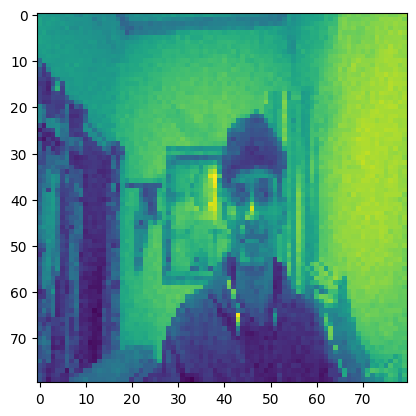

Male


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


imagepth = "C:\\Users\\91992\\OneDrive\\Pictures\\Camera Roll\\WIN_20221211_22_47_17_Pro.jpg"

imgo = cv2.imread(imagepth)

imgo = cv2.resize(imgo, (80,80))

img = cv2.cvtColor(imgo, cv2.COLOR_BGR2GRAY)

img = np.array(img)

img = img/255

input = np.expand_dims(img, axis=0)

prediction = model.predict(input)

gender = prediction.argmax(axis = 1)

if gender==1:
    str = 'Male'
else:
    str = 'Female'



imgplot = plt.imshow(img)
plt.show()


print(str)


## Video input

In [5]:
cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()

    frame_res = cv2.resize(frame, (80, 80))

    imgp = cv2.cvtColor(frame_res, cv2.COLOR_BGR2GRAY)

    imgp = np.array(imgp)

    imgp = imgp/255

    # Add batch dimension to match the model's input shape
    input_data = np.expand_dims(imgp, axis=0)

    prediction = model.predict(input_data)

    gender = prediction.argmax(axis = 1)

    
    if gender==1:
        str = 'male'
    else:
        str = 'female'

    cv2.putText(frame, str, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 2,(0,0,0), 3, cv2.LINE_AA )


    cv2.imshow("Live Camera", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 23ms/step
